In [5]:
%load_ext autoreload
%autoreload 2
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
from utils import generate_sparse, generate_sparse_randn, sign, snr, angular_error, hard_threshold
from algos import reconstruct, reconstruct_1bit, reconstruct_biht

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Parameters

n = 1000
s = 10
m = 500

x_0 = generate_sparse_randn(n, s)
# x_0 = generate_sparse(n, s)
# Generate sensing matrix

A = np.random.randn(m, n)
# Compute y


y = sign(A.dot(x_0))

In [8]:
xx_biht = reconstruct_biht(y, A, 10, 100, 10e-3)

In [9]:
xx = reconstruct_1bit(y, A)

Calling solver.
                                     CVXPY                                     
                                    v1.1.11                                    
(CVXPY) Mar 09 06:25:30 PM: Your problem has 1000 variables, 2 constraints, and 0 parameters.
(CVXPY) Mar 09 06:25:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 09 06:25:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 09 06:25:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 09 06:25:30 PM: Compiling problem (target solver=ECOS).
(CVXPY) Mar 09 06:25:30 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> Con

In [ ]:
xx_cs = reconstruct(y, A)

In [122]:
xx_cs_cp = xx_cs.copy()
xx_cs_threshold = hard_threshold(xx_cs_cp, s)

<ipython-input-123-e309ead9065f>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(n), x_0 / np.linalg.norm(x_0), label="True signal")


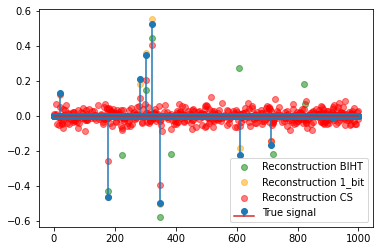

In [123]:
plt.stem(np.arange(n), x_0 / np.linalg.norm(x_0), label="True signal")
plt.scatter(np.arange(n), xx_biht / np.linalg.norm(xx_biht), label="Reconstruction BIHT", alpha=0.5, color="green")
plt.scatter(np.arange(n), xx / np.linalg.norm(xx), label="Reconstruction 1_bit", alpha=0.5, color="orange")
plt.scatter(np.arange(n), xx_cs / np.linalg.norm(xx_cs), label="Reconstruction CS", alpha=0.5, color="red")

plt.legend()
plt.savefig(f"figures/recon-synth-{m}.png", dpi=800)
plt.show()

<ipython-input-124-0f45b7f396ae>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(n), x_0 / np.linalg.norm(x_0), label="True signal")


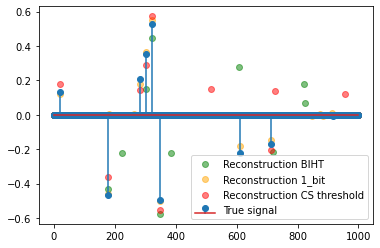

In [124]:
plt.stem(np.arange(n), x_0 / np.linalg.norm(x_0), label="True signal")
plt.scatter(np.arange(n), xx_biht / np.linalg.norm(xx_biht), label="Reconstruction BIHT", alpha=0.5, color="green")
plt.scatter(np.arange(n), xx / np.linalg.norm(xx), label="Reconstruction 1_bit", alpha=0.5, color="orange")
plt.scatter(np.arange(n), xx_cs_threshold / np.linalg.norm( xx_cs_threshold), label="Reconstruction CS threshold", alpha=0.5, color="red")

plt.legend()
plt.savefig(f"figures/recon-synth-{m}.png", dpi=800)
plt.show()

In [144]:
snr_1bit = snr(xx / np.linalg.norm(xx), x_0 / np.linalg.norm(x_0))
snr_cs = snr(xx_cs / np.linalg.norm(xx_cs_threshold), x_0 / np.linalg.norm(x_0))
snr_biht = snr(xx_biht / np.linalg.norm(xx_biht), x_0 / np.linalg.norm(x_0))

print(f"Signal-to-Noise ratio : 1-bit = {snr_1bit},  BIHT =  {snr_biht} ,  CS =  {snr_cs}")

Signal-to-Noise ratio : 1-bit = 23.55579886083163,  BIHT =  3.4283542940991714 ,  CS =  1.9113397205579914


4.0892518390425225

In [145]:
ae_1bit = angular_error(xx / np.linalg.norm(xx), x_0 / np.linalg.norm(x_0))
ae_biht = angular_error(xx_biht / np.linalg.norm(xx_biht), x_0 / np.linalg.norm(x_0))
ae_cs = angular_error(xx_cs / np.linalg.norm(xx_cs), x_0 / np.linalg.norm(x_0))

print(f"Angular error : 1-bit = {ae_1bit},  BIHT =  {ae_biht},  CS =  {ae_cs}")

Angular error : 1-bit = 0.02114170529871155,  BIHT =  0.21878375879381917,  CS =  0.26284055813352825


In [67]:
angular_error(xx_cs / np.linalg.norm(xx_cs), x_0 / np.linalg.norm(x_0))

0.05737948663402774

In [148]:
N_TRIALS = 2

In [163]:
m_n = []
avg_snr = []
avg_snr_cs = []
avg_snr_biht = []


for m in range(1, 2 * n, 100):
    print(m/n)
    results = []
    results_cs = []
    results_biht = []
    # parallelize loop below with:
    # https://web.stanford.edu/~boyd/papers/pdf/cvxpy_paper.pdf (section 5)
    for _ in range(N_TRIALS):
        x_0 = generate_sparse_randn(n, s)
        x_0_norm = x_0 / np.linalg.norm(x_0)
        A = np.random.randn(m, n)
        y = sign(A.dot(x_0))
        
        xx = reconstruct_1bit(y, A)
        xx_norm = xx / np.linalg.norm(xx)
        
        xx_cs = reconstruct(y, A)
        xx_cs_norm = xx_cs / np.linalg.norm(xx_cs)
        
        xx_biht = reconstruct_biht(y, A, s, 100)
        xx_biht_norm = xx_biht / np.linalg.norm(xx_biht)
        
        results.append(snr(xx_norm, x_0_norm))
        results_cs.append(snr(xx_cs_norm, x_0_norm))
        results_biht.append(snr(xx_biht_norm, x_0_norm))

    m_n.append(m)
    avg_snr.append(np.mean(results))
    avg_snr_cs.append(np.mean(results_cs))
    avg_snr_biht.append(np.mean(results_biht))

0.001
Calling solver.
                                     CVXPY                                     
                                    v1.1.11                                    
(CVXPY) Mar 09 05:00:47 PM: Your problem has 1000 variables, 2 constraints, and 0 parameters.
(CVXPY) Mar 09 05:00:47 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 09 05:00:47 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 09 05:00:47 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 09 05:00:47 PM: Compiling problem (target solver=ECOS).
(CVXPY) Mar 09 05:00:47 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr 

(CVXPY) Mar 09 05:00:47 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 09 05:00:47 PM: Compiling problem (target solver=ECOS).
(CVXPY) Mar 09 05:00:47 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Mar 09 05:00:47 PM: Applying reduction Dcp2Cone
(CVXPY) Mar 09 05:00:47 PM: Applying reduction CvxAttr2Constr
(CVXPY) Mar 09 05:00:47 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Mar 09 05:00:47 PM: Applying reduction ECOS
(CVXPY) Mar 09 05:00:47 PM: Finished problem compilation (took 6.518e-02 seconds).
(CVXPY) Mar 09 05:00:47 PM: (Subsequent compilations of this problem, using the same arguments, should take less time.)
----------------------

<ipython-input-163-a77589133028>:27: RuntimeWarning: invalid value encountered in true_divide
  xx_biht_norm = xx_biht / np.linalg.norm(xx_biht)


(CVXPY) Mar 09 05:00:47 PM: Compilation took 6.518e-02 seconds
(CVXPY) Mar 09 05:00:47 PM: Solver (including time spent in interface) took 1.575e-01 seconds
Calling solver.
                                     CVXPY                                     
                                    v1.1.11                                    
(CVXPY) Mar 09 05:00:47 PM: Your problem has 1000 variables, 2 constraints, and 0 parameters.
(CVXPY) Mar 09 05:00:47 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 09 05:00:47 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 09 05:00:47 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
---------------------------------------------------------------------

(CVXPY) Mar 09 05:00:48 PM: Optimal value: 3.107e+00
(CVXPY) Mar 09 05:00:48 PM: Compilation took 1.028e-01 seconds
(CVXPY) Mar 09 05:00:48 PM: Solver (including time spent in interface) took 4.861e-01 seconds
Calling solver.
                                     CVXPY                                     
                                    v1.1.11                                    
(CVXPY) Mar 09 05:00:49 PM: Your problem has 1000 variables, 2 constraints, and 0 parameters.
(CVXPY) Mar 09 05:00:49 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 09 05:00:49 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 09 05:00:49 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------

(CVXPY) Mar 09 05:00:52 PM: Optimal value: 3.201e+00
(CVXPY) Mar 09 05:00:52 PM: Compilation took 1.428e-01 seconds
(CVXPY) Mar 09 05:00:52 PM: Solver (including time spent in interface) took 2.255e+00 seconds
Calling solver.
                                     CVXPY                                     
                                    v1.1.11                                    
(CVXPY) Mar 09 05:00:54 PM: Your problem has 1000 variables, 2 constraints, and 0 parameters.
(CVXPY) Mar 09 05:00:54 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 09 05:00:54 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 09 05:00:54 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------

(CVXPY) Mar 09 05:01:01 PM: Optimal value: 3.324e+00
(CVXPY) Mar 09 05:01:01 PM: Compilation took 1.930e-01 seconds
(CVXPY) Mar 09 05:01:01 PM: Solver (including time spent in interface) took 4.252e+00 seconds
Calling solver.
                                     CVXPY                                     
                                    v1.1.11                                    
(CVXPY) Mar 09 05:01:05 PM: Your problem has 1000 variables, 2 constraints, and 0 parameters.
(CVXPY) Mar 09 05:01:05 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 09 05:01:05 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 09 05:01:05 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------

19  +3.227e+00  +3.227e+00  +8e-10  5e-14  4e-14  3e-14  3e-13  0.9890  1e-04   1  0  0 |  0  0

OPTIMAL (within feastol=5.2e-14, reltol=2.3e-10, abstol=7.5e-10).
Runtime: 7.623045 seconds.

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Mar 09 05:01:18 PM: Problem status: optimal
(CVXPY) Mar 09 05:01:18 PM: Optimal value: 3.227e+00
(CVXPY) Mar 09 05:01:18 PM: Compilation took 2.361e-01 seconds
(CVXPY) Mar 09 05:01:18 PM: Solver (including time spent in interface) took 7.624e+00 seconds
Calling solver.
                                     CVXPY                                     
                                    v1.1.11                                    
(CVXPY) Mar 09 05:01:22 PM: Your problem has 1000 variables, 2 constraints, and 0 parameters.
(CVXPY) Mar 09 05:01:22 PM: It is com

15  +3.163e+00  +3.163e+00  +9e-03  5e-07  5e-07  5e-07  3e-06  0.8109  3e-02   1  1  1 |  0  0
16  +3.163e+00  +3.163e+00  +3e-03  2e-07  1e-07  1e-07  1e-06  0.7721  1e-01   1  1  1 |  0  0
17  +3.163e+00  +3.163e+00  +4e-05  3e-09  2e-09  2e-09  2e-08  0.9878  3e-03   1  1  1 |  0  0
18  +3.163e+00  +3.163e+00  +4e-07  3e-11  3e-11  2e-11  2e-10  0.9890  1e-04   1  1  1 |  0  0
19  +3.163e+00  +3.163e+00  +5e-09  3e-13  3e-13  3e-13  2e-12  0.9890  1e-04   1  0  0 |  0  0

OPTIMAL (within feastol=3.1e-13, reltol=1.5e-09, abstol=4.9e-09).
Runtime: 7.471479 seconds.

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Mar 09 05:01:38 PM: Problem status: optimal
(CVXPY) Mar 09 05:01:38 PM: Optimal value: 3.163e+00
(CVXPY) Mar 09 05:01:38 PM: Compilation took 2.859e-01 seconds
(CVXPY) Mar 09 05

 7  +2.914e+00  +2.918e+00  +1e+01  7e-04  8e-04  3e-03  4e-03  0.5433  3e-01   1  1  1 |  0  0
 8  +2.984e+00  +2.985e+00  +5e+00  3e-04  3e-04  1e-03  2e-03  0.7093  2e-01   1  1  1 |  0  0
 9  +3.020e+00  +3.020e+00  +2e+00  1e-04  1e-04  3e-04  7e-04  0.6679  1e-01   1  1  1 |  0  0
10  +3.034e+00  +3.034e+00  +9e-01  5e-05  6e-05  1e-04  3e-04  0.5751  6e-02   1  1  1 |  0  0
11  +3.040e+00  +3.040e+00  +4e-01  2e-05  3e-05  5e-05  1e-04  0.7049  2e-01   1  1  1 |  0  0
12  +3.042e+00  +3.042e+00  +2e-01  1e-05  1e-05  2e-05  8e-05  0.5913  2e-01   1  1  1 |  0  0
13  +3.044e+00  +3.044e+00  +1e-01  6e-06  7e-06  1e-05  4e-05  0.5597  7e-02   1  1  1 |  0  0
14  +3.045e+00  +3.045e+00  +3e-02  2e-06  2e-06  2e-06  1e-05  0.8031  1e-01   1  1  1 |  0  0
15  +3.045e+00  +3.045e+00  +4e-03  2e-07  3e-07  2e-07  1e-06  0.9194  6e-02   1  1  1 |  0  0
16  +3.045e+00  +3.045e+00  +3e-04  2e-08  2e-08  1e-08  1e-07  0.9700  5e-02   1  1  1 |  0  0
17  +3.045e+00  +3.045e+00  +3e-06  2e-1


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  +2.915e+00  +1e+04  1e+00  3e+00  1e+00  5e+00    ---    ---    1  1  - |  -  - 
 1  +1.396e+02  +1.475e+02  +1e+04  6e-01  2e+00  7e+00  4e+00  0.7523  7e-01   1  1  1 |  0  0
 2  -3.560e-01  +6.976e+00  +2e+03  9e-02  2e-01  7e+00  9e-01  0.9890  2e-01   1  1  1 |  0  0
 3  +9.137e-01  +2.269e+00  +7e+02  2e-02  6e-02  1e+00  2e-01  0.7923  1e-01   1  1  1 |  0  0
 4  +1.187e+00  +1.389e+00  +1e+02  6e-03  1e-02  2e-01  5e-02  0.8081  2e-02   1  1  1 |  0  0
 5  +2.342e+00  +2.387e+00  +4e+01  2e-03  3e-03  4e-02  2e-02  0.7825  1e-01   1  1  1 |  0  0
 6  +2.783e+00  +2.798e+00  +2e+01  9e-04  1e-03  1e-02  6e-03  0.6876  1e-01   1  1  1 |  0  0
 7  +2.909e+00  +2.917e+00  +1e+01  5e-04  6e-04  7e-03  4e-03  0.4736  1e-01   1  1  1 |  0  0
 8  +2.999e+00  +3.001e+00  +5e+00  2e-04  3e-

(CVXPY) Mar 09 05:03:27 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Mar 09 05:03:27 PM: Applying reduction Dcp2Cone
(CVXPY) Mar 09 05:03:27 PM: Applying reduction CvxAttr2Constr
(CVXPY) Mar 09 05:03:27 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Mar 09 05:03:27 PM: Applying reduction ECOS
(CVXPY) Mar 09 05:03:27 PM: Finished problem compilation (took 4.156e-01 seconds).
(CVXPY) Mar 09 05:03:27 PM: (Subsequent compilations of this problem, using the same arguments, should take less time.)
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 09 05:03:27 PM: Invoking solver ECOS to obtain a solution.

ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    

(CVXPY) Mar 09 05:04:21 PM: Optimal value: 3.423e+00
(CVXPY) Mar 09 05:04:21 PM: Compilation took 4.141e-01 seconds
(CVXPY) Mar 09 05:04:21 PM: Solver (including time spent in interface) took 1.422e+01 seconds
1.001
Calling solver.
                                     CVXPY                                     
                                    v1.1.11                                    
(CVXPY) Mar 09 05:04:33 PM: Your problem has 1000 variables, 2 constraints, and 0 parameters.
(CVXPY) Mar 09 05:04:33 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 09 05:04:33 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 09 05:04:33 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------

TypeError: unsupported operand type(s) for *: 'NoneType' and 'NoneType'

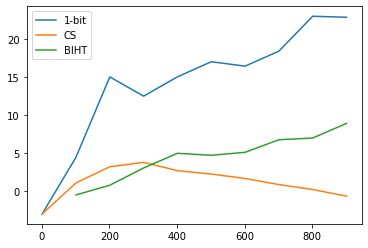

In [164]:
plt.plot(m_n, avg_snr, label='1-bit')
plt.plot(m_n, avg_snr_cs, label='CS')
plt.plot(m_n, avg_snr_biht, label='BIHT')
plt.legend()